In [2]:
# Import Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import seaborn as sns

In [3]:
# Set view options for info() and head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Import data (We need to establish a Database and call that. The excel file is too big.)
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/SLADA_Project.ipynb")

# Exploritory Data Analysis



In [ ]:
# check the first rows of data
data.head()

NameError: name 'data' is not defined

In [ ]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64948 entries, 0 to 64947
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           64948 non-null  int64  
 1   Protocol           64948 non-null  int64  
 2   Timestamp          64948 non-null  object 
 3   Flow Duration      64948 non-null  int64  
 4   Tot Fwd Pkts       64948 non-null  int64  
 5   Tot Bwd Pkts       64948 non-null  int64  
 6   TotLen Fwd Pkts    64948 non-null  int64  
 7   TotLen Bwd Pkts    64948 non-null  float64
 8   Fwd Pkt Len Max    64948 non-null  int64  
 9   Fwd Pkt Len Min    64948 non-null  int64  
 10  Fwd Pkt Len Mean   64948 non-null  float64
 11  Fwd Pkt Len Std    64948 non-null  float64
 12  Bwd Pkt Len Max    64948 non-null  int64  
 13  Bwd Pkt Len Min    64948 non-null  int64  
 14  Bwd Pkt Len Mean   64948 non-null  float64
 15  Bwd Pkt Len Std    64948 non-null  float64
 16  Flow Byts/s        649

In [ ]:
# Convert Data Types
data2 = data.convert_dtypes()

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1079: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1104: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [ ]:
# check the data types
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64948 entries, 0 to 64947
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           64948 non-null  Int64  
 1   Protocol           64948 non-null  Int64  
 2   Timestamp          64948 non-null  string 
 3   Flow Duration      64948 non-null  Int64  
 4   Tot Fwd Pkts       64948 non-null  Int64  
 5   Tot Bwd Pkts       64948 non-null  Int64  
 6   TotLen Fwd Pkts    64948 non-null  Int64  
 7   TotLen Bwd Pkts    64948 non-null  Int64  
 8   Fwd Pkt Len Max    64948 non-null  Int64  
 9   Fwd Pkt Len Min    64948 non-null  Int64  
 10  Fwd Pkt Len Mean   64948 non-null  Float64
 11  Fwd Pkt Len Std    64948 non-null  Float64
 12  Bwd Pkt Len Max    64948 non-null  Int64  
 13  Bwd Pkt Len Min    64948 non-null  Int64  
 14  Bwd Pkt Len Mean   64948 non-null  Float64
 15  Bwd Pkt Len Std    64948 non-null  Float64
 16  Flow Byts/s        649

In [ ]:
# Summary stats of the data
data.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,75131.000000,75131.000000,7.513100e+04,75131.000000,75131.000000,75131.000000,7.513100e+04,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,7.508300e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,7.513100e+04,75131.000000,75131.0,75131.0,75131.0,75131.000000,75131.000000,7.513100e+04,7.513100e+04,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.0,75131.000000,75131.000000,75131.000000,75131.000000,75131.000000,75131.0,75131.0,75131.0,75130.0,75130.0,75130.0,75130.000000,75130.000000,75130.000000,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,7.513000e+04,7.513000e+04,7.513000e+04,7.513000e+04,7.513000e+04,7.513000e+04,7.513000e+04,7.513000e+04
mean,8359.334456,6.347260,3.814869e+06,4.828287,3.975177,277.995168,8.808648e+02,193.193183,1.557653,57.577059,94.683323,170.411069,3.572893,44.097270,67.776827,inf,inf,2.217546e+05,2.211161e+05,8.720383e+05,1.054272e+05,3.758109e+06,3.212641e+05,2.232883e+05,8.633521e+05,1.668626e+05,2.692624e+06,2.075247e+05,1.800699e+05,5.711403e+05,7.340966e+04,0.013124,0.0,0.0,0.0,90.949834,82.396507,5.462815e+03,5.804075e+02,1.538659,253.251694,43.894666,80.892951,16866.546105,0.000466,0.013124,0.459198,0.522141,0.430248,0.003940,0.0,0.459198,0.468462,49.268106,57.577059,44.097270,0.0,0.0,0.0,0.0,0.0,0.0,4.828324,277.998869,3.975230,8.803150e+02,5577.057846,5999.483748,1.400146,19.379369,3.083168e+05,1.648884e+05,4.454309e+05,1.932724e+05,6.693682e+05,6.771220e+04,7.262430e+05,6.075407e+05
std,8510.492023,2.176053,1.953599e+07,24.102688,39.539426,1351.545335,4.977094e+04,215.787121,11.504761,57.408805,97.460379,343.667054,20.931322,88.477359,128.773684,NaN,NaN,2.563858e+06,1.507921e+06,5.604529e+06,2.432021e+06,1.940166e+07,2.910596e+06,1.617770e+06,5.506298e+06,2.726621e+06,1.635800e+07,1.755192e+06,1.450112e+06,4.383179e+06,1.365496e+06,0.113805,0.0,0.0,0.0,420.077999,721.416409,7.109568e+04,1.484386e+04,11.276431,346.956596,60.186951,101.602234,38734.313677,0.021579,0.113805,0.498336,0.499513,0.495114,0.062644,0.0,0.498336,0.973193,64.420789,57.408805,88.477359,0.0,0.0,0.0,0.0,0.0,0.0,24.102846,1351.553949,39.539686,4.963934e+04,6378.787446,18106.998095,15.674185,3.051461,3.988393e+06,2.455750e+06,5.308177e+06,3.344958e+06,5.112548e+06,9.749037e+05,5.406773e+06,4.930109e+06
min,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.674357e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.

In [ ]:
# Summary stats of the data
data2.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75083.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75131.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0,75130.0
mean,8359.334456,6.34726,3814869.268065,4.828287,3.975177,277.995168,880.864836,193.193183,1.557653,57.577059,94.683323,170.411069,3.572893,44.09727,67.776827,inf,inf,221754.598132,221116.083714,872038.328759,105427.185689,3758109.098787,321264.13239,223288.342718,863352.082376,166862.558265,2692624.405452,207524.722313,180069.936947,571140.28598,73409.65656,0.013124,0.0,0.0,0.0,90.949834,82.396507,5462.815448,580.407457,1.538659,253.251694,43.894666,80.892951,16866.546105,0.000466,0.013124,0.459198,0.522141,0.430248,0.00394,0.0,0.459198,0.468462,49.268106,57.577059,44.09727,0.0,0.0,0.0,0.0,0.0,0.0,4.828324,277.998869,3.97523,880.315001,5577.057846,5999.483748,1.400146,19.379369,308316.80527,164888.37804,445430.859856,193272.437894,669368.164255,67712.199898,726243.030667,607540.720724
std,8510.492023,2.176053,19535992.412738,24.102688,39.539426,1351.545335,49770.944478,215.787121,11.504761,57.408805,97.460379,343.667054,20.931322,88.477359,128.773684,<NA>,<NA>,2563857.728693,1507920.660789,5604528.808138,2432021.135544,19401655.465406,2910595.639688,1617769.526644,5506298.090722,2726621.364311,16358003.53606,1755192.418268,1450112.449714,4383179.106097,1365496.426735,0.113805,0.0,0.0,0.0,420.077999,721.416409,71095.683315,14843.856362,11.276431,346.956596,60.186951,101.602234,38734.313677,0.021579,0.113805,0.498336,0.499513,0.495114,0.062644,0.0,0.498336,0.973193,64.420789,57.408805,88.477359,0.0,0.0,0.0,0.0,0.0,0.0,24.102846,1351.553949,39.539686,49639.338023,6378.787446,18106.998095,15.674185,3.051461,3988392.509679,2455749.948026,5308177.429806,3344958.337874,5112548.449628,974903.655111,5406772.922534,4930109.13183
min,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8080.0,6.0,491.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,603.422267,491.0,0.0,491.0,15.0,478.0,269.5,0.0,460.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,259.313683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2052.0,-1.0,0.0,20.0,0.0,0.0

In [ ]:
# Encode the Label variable
data2['Label'] = pd.Categorical(data2['Label']).codes

In [ ]:
# check the data types after Label conversion
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64948 entries, 0 to 64947
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           64948 non-null  Int64  
 1   Protocol           64948 non-null  Int64  
 2   Timestamp          64948 non-null  string 
 3   Flow Duration      64948 non-null  Int64  
 4   Tot Fwd Pkts       64948 non-null  Int64  
 5   Tot Bwd Pkts       64948 non-null  Int64  
 6   TotLen Fwd Pkts    64948 non-null  Int64  
 7   TotLen Bwd Pkts    64948 non-null  Int64  
 8   Fwd Pkt Len Max    64948 non-null  Int64  
 9   Fwd Pkt Len Min    64948 non-null  Int64  
 10  Fwd Pkt Len Mean   64948 non-null  Float64
 11  Fwd Pkt Len Std    64948 non-null  Float64
 12  Bwd Pkt Len Max    64948 non-null  Int64  
 13  Bwd Pkt Len Min    64948 non-null  Int64  
 14  Bwd Pkt Len Mean   64948 non-null  Float64
 15  Bwd Pkt Len Std    64948 non-null  Float64
 16  Flow Byts/s        649

**Univariate Analysis**
* Histogram
* KDE
* Boxplot

In [ ]:
# Columns
data2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
# Get value counts for each column individually
# Too many to run, need to do invidually if necessary

"""for col in ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']:
    print(data2[col].value_counts()[:1000])"""

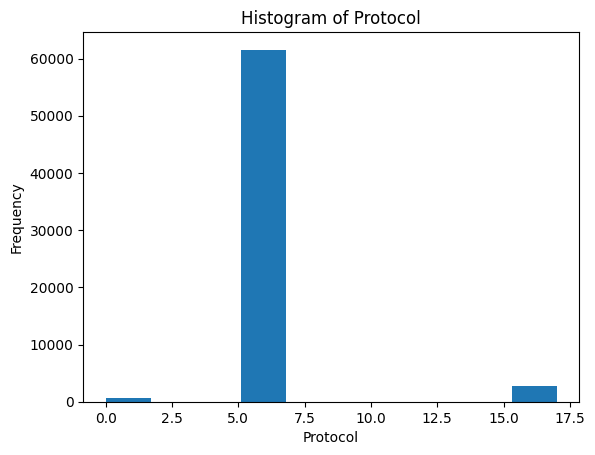

In [ ]:
# Histogram of Protocol
plt.hist(data2['Protocol'])
plt.title('Histogram of Protocol')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.show()

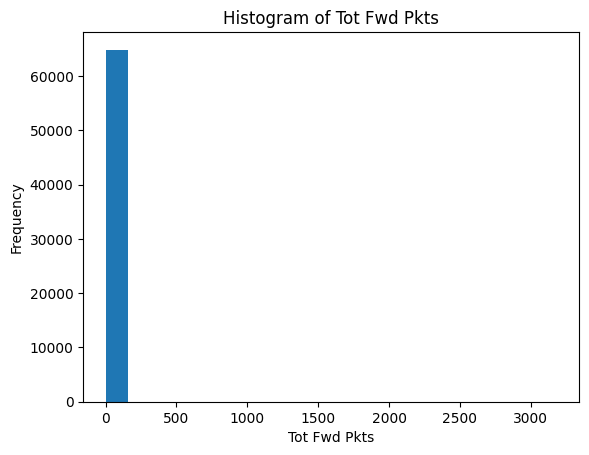

In [ ]:
# Histogram of Tot Fwd Pkts with 20 bins
plt.hist(data2['Tot Fwd Pkts'], bins=20)
plt.title('Histogram of Tot Fwd Pkts')
plt.xlabel('Tot Fwd Pkts')
plt.ylabel('Frequency')
plt.show()

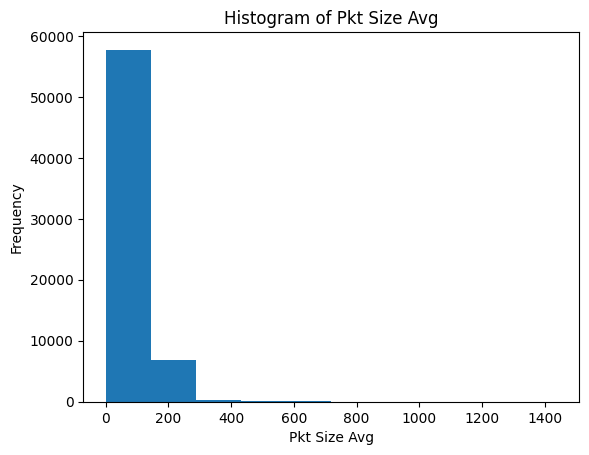

In [ ]:
# Histogram of Pkt Size Avg with 20 bins
plt.hist(data2['Pkt Size Avg'], bins=10)
plt.title('Histogram of Pkt Size Avg')
plt.xlabel('Pkt Size Avg')
plt.ylabel('Frequency')
plt.show()

<Axes: >

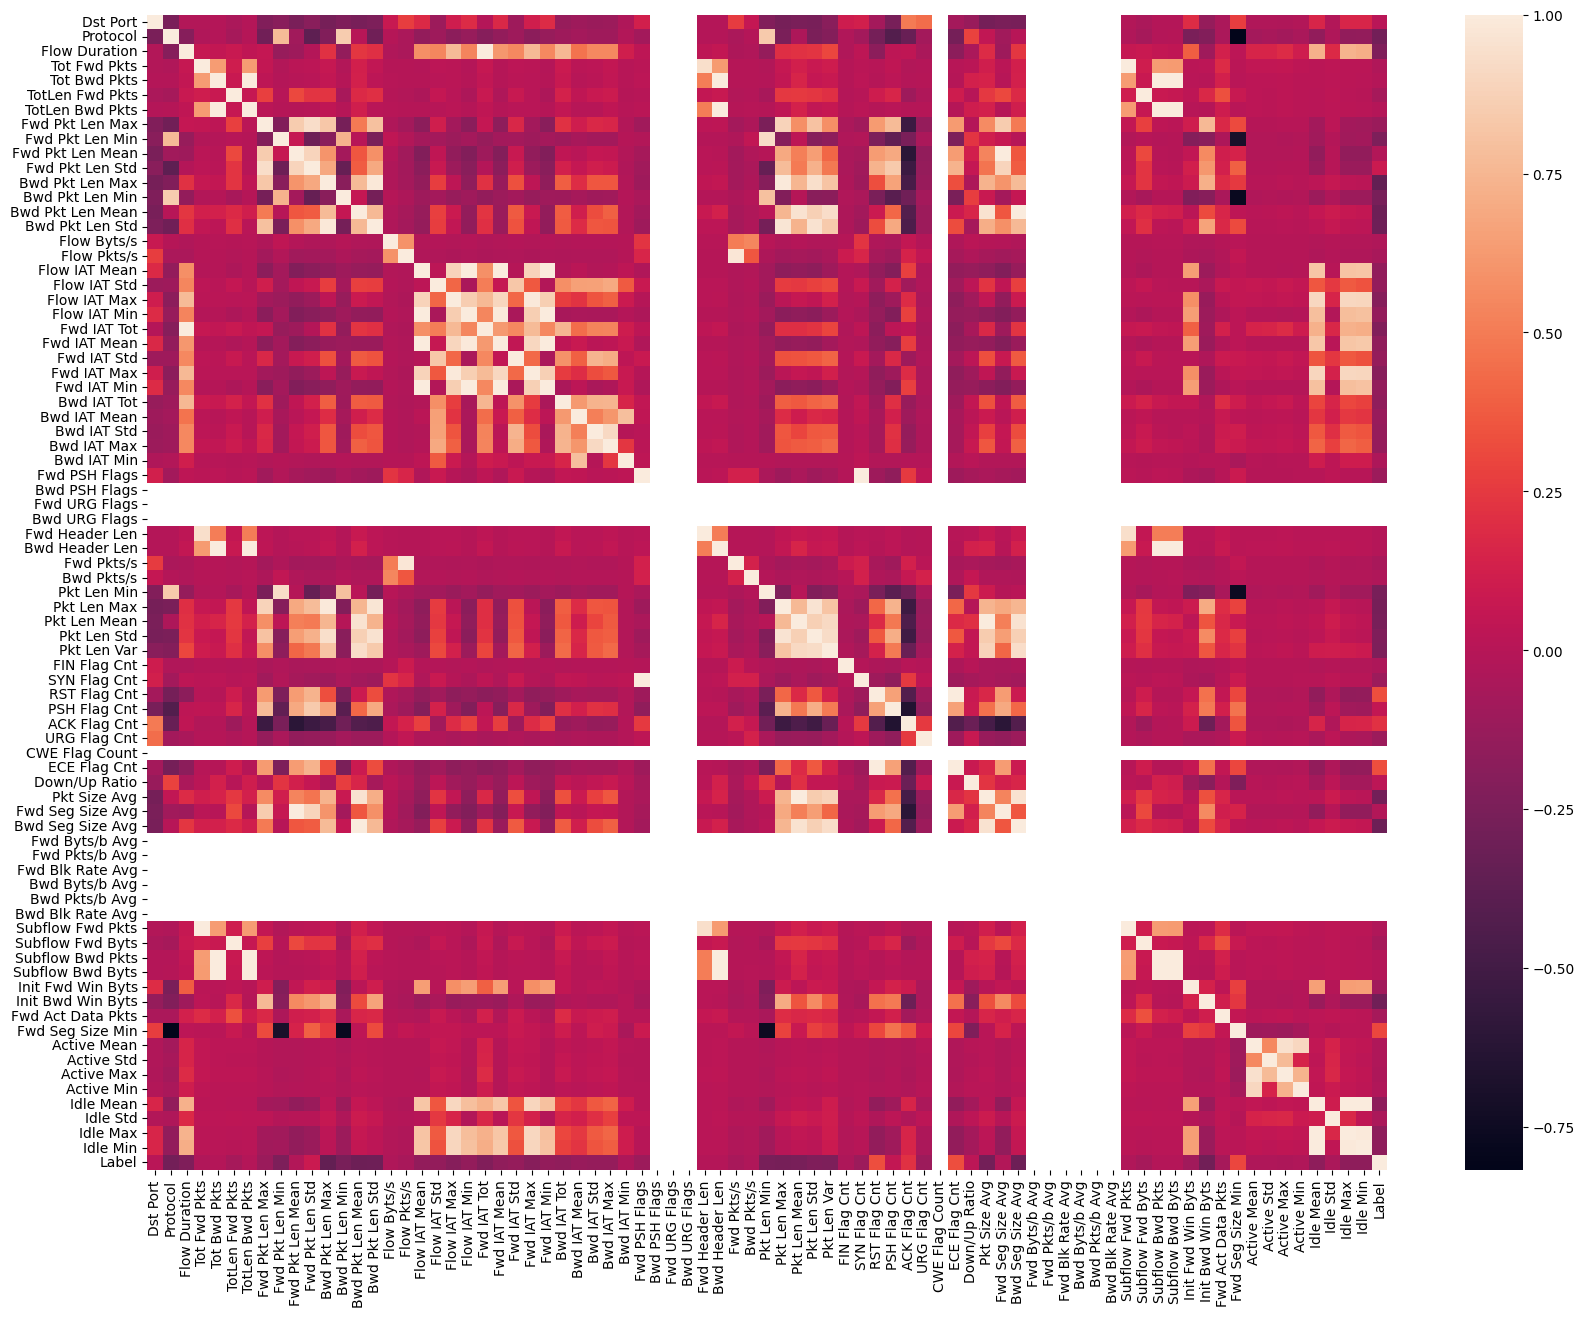

In [ ]:
# Heat map of correlations without the Timestamp variable
data2_drop = data2.drop(['Timestamp'], axis=1)
plt.subplots(figsize=(20,15))
sns.heatmap(data2_drop.corr())

In [ ]:
# Calculate the correlation matrix
corr_matrix = data2_drop.corr().abs()

# Find features with correlation less than 0.7 in the label column
correlations = data2_drop.corr()['Label']
high_corr_features = correlations[abs(correlations) > 0.7].index.tolist()

In [ ]:
# Drop the low correlation features
df_reduced = data2_drop.drop(high_corr_features, axis=1)

# Print the correlation Matrix and the feature reduced data frame
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                    Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  \
Dst Port           1.000000  0.249702       0.015558      0.018320   
Protocol           0.249702  1.000000       0.204834      0.024757   
Flow Duration      0.015558  0.204834       1.000000      0.068453   
Tot Fwd Pkts       0.018320  0.024757       0.068453      1.000000   
Tot Bwd Pkts       0.013867  0.011489       0.051408      0.635382   
TotLen Fwd Pkts    0.047405  0.067959       0.083748      0.106237   
TotLen Bwd Pkts    0.008798  0.007082       0.039070      0.630873   
Fwd Pkt Len Max    0.227115  0.288226       0.062702      0.049096   
Fwd Pkt Len Min    0.191261  0.767997       0.130807      0.019122   
Fwd Pkt Len Mean   0.249918  0.091126       0.102174      0.013749   
Fwd Pkt Len Std    0.191865  0.370163       0.010176      0.024989   
Bwd Pkt Len Max    0.265766  0.221932       0.217550      0.066878   
Bwd Pkt Len Min    0.235000  0.850431       0.149143      0.017845  

In [ ]:
df_reduced.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,6,141385,9,7,553,3773,202,0,61.444444,87.534438,1460,0,539.0,655.432936,30597.30523,113.166178,9425.666667,19069.11685,73403,1,141385,17673.125,23965.32327,73403,22,51417,8569.5,13036.89082,31525,1,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.3897,0,0,1,1,0,0,0,1,0,270.375,61.444444,539.0,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0,0,0.0,0.0,0,0
1,49684,6,281,2,1,38,0,38,0,19.0,26.870058,0,0,0.0,0.0,135231.3167,10676.15658,140.5,174.655375,264,17,281,281.0,0.0,281,281,0,0.0,0.0,0,0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.0,21.93931,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.0,0.0,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,443,6,279824,11,15,1086,10527,385,0,98.727273,129.392497,1460,0,701.8,636.314186,41501.0864,92.915547,11192.96,24379.44834,112589,1,279728,27972.8,36167.74032,112589,94,258924,18494.57143,36356.50372,133669,1,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.1795,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.8,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0,0,0.0,0.0,0,0
3,443,6,132,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,15151.51515,132.0,0.0,132,132,132,132.0,0.0,132,132,0,0.0,0.0,0,0,0,0,0,0,40,0,15151.51515,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,443,6,274016,9,13,1285,6141,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.38095,26311.62703,114077,1,273946,34243.25,37996.56546,114077,201,252994,21082.83333,39075.73819,135611,1,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.3004,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
df = pd.DataFrame(df_reduced)

# Get count of unique items for all columns
unique_counts = df.apply(pd.Series.nunique)
print("Count of unique items for each column:")
print(unique_counts)
df.info()

Count of unique items for each column:
Dst Port              37304
Protocol                  3
Flow Duration        442344
Tot Fwd Pkts            754
Tot Bwd Pkts           1064
TotLen Fwd Pkts        6266
TotLen Bwd Pkts       18066
Fwd Pkt Len Max        1424
Fwd Pkt Len Min         184
Fwd Pkt Len Mean      20086
Fwd Pkt Len Std       33062
Bwd Pkt Len Max         993
Bwd Pkt Len Min         287
Bwd Pkt Len Mean      29443
Bwd Pkt Len Std       34946
Flow Byts/s          458104
Flow Pkts/s          455755
Flow IAT Mean        400220
Flow IAT Std         524747
Flow IAT Max         195722
Flow IAT Min          44058
Fwd IAT Tot          280941
Fwd IAT Mean         351690
Fwd IAT Std          314718
Fwd IAT Max          253282
Fwd IAT Min           76576
Bwd IAT Tot          251488
Bwd IAT Mean         316792
Bwd IAT Std          427831
Bwd IAT Max          153810
Bwd IAT Min          135436
Fwd PSH Flags             2
Bwd PSH Flags             1
Fwd URG Flags             1
Bwd URG F

In [ ]:
df = pd.DataFrame(df_reduced)

# Identify columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Drop those columns
df_reduced = df.drop(columns=columns_to_drop)

print("Columns to drop:", columns_to_drop)
print("\nReduced DataFrame:\n", df_reduced.info())

Columns to drop: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  Int64  
 1   Protocol           1048575 non-null  Int64  
 2   Flow Duration      1048575 non-null  Int64  
 3   Tot Fwd Pkts       1048575 non-null  Int64  
 4   Tot Bwd Pkts       1048575 non-null  Int64  
 5   TotLen Fwd Pkts    1048575 non-null  Int64  
 6   TotLen Bwd Pkts    1048575 non-null  Int64  
 7   Fwd Pkt Len Max    1048575 non-null  Int64  
 8   Fwd Pkt Len Min    1048575 non-null  Int64  
 9   Fwd Pkt Len Mean   1048575 non-null  Float64
 10  Fwd Pkt Len Std    1048575 non-null  Float64
 11  Bwd Pkt Len Max    1048575 non-nu

In [ ]:
# New Heat map of correlations with reduced features
plt.subplots(figsize=(50,50))
sns.heatmap(df_reduced.corr(), annot=True, fmt=".2f")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(df_reduced)

# Understand the structure
print(df.info())
print(df.describe())

# Handling missing values
print(df.isnull().sum())

# Visualizing distributions
# Histogram
df['numerical_feature'].hist()
plt.title('Histogram of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box plot
sns.boxplot(x='categorical_feature', y='numerical_feature', data=df)
plt.title('Box Plot of Numerical Feature by Categorical Feature')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Handling missing data by imputation
df['numerical_feature'].fillna(df['numerical_feature'].mean(), inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['categorical_feature'])

# Feature Engineering example
df['new_feature'] = df['numerical_feature'] ** 2

# Feature Selection example
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('target', axis=1)
y = df['target']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64948 entries, 0 to 64947
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           64948 non-null  Int64  
 1   Protocol           64948 non-null  Int64  
 2   Flow Duration      64948 non-null  Int64  
 3   Tot Fwd Pkts       64948 non-null  Int64  
 4   TotLen Fwd Pkts    64948 non-null  Int64  
 5   Fwd Pkt Len Max    64948 non-null  Int64  
 6   Fwd Pkt Len Min    64948 non-null  Int64  
 7   Bwd Pkt Len Max    64948 non-null  Int64  
 8   Flow Byts/s        64900 non-null  Float64
 9   Flow Pkts/s        64948 non-null  Float64
 10  Flow IAT Mean      64948 non-null  Float64
 11  Flow IAT Std       64948 non-null  Float64
 12  Bwd IAT Mean       64948 non-null  Float64
 13  Fwd PSH Flags      64948 non-null  Int64  
 14  Bwd PSH Flags      64948 non-null  Int64  
 15  Fwd URG Flags      64948 non-null  Int64  
 16  Bwd URG Flags      649

KeyError: 'numerical_feature'